In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from datetime import timedelta

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importation et familiarisation avec le jeu de données

In [ ]:
df = pd.read_csv('./SWaT_dataset_Jul_19_v2.csv')
#df = pd.read_csv('drive/MyDrive/PDD/SWaT_dataset_Jul_19_v2.csv')
#df = pd.read_csv('drive/MyDrive/ProtectionDeDonnees/SWaT_dataset_Jul_19_v2.csv')

df.head()

/home/porte/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,74,75,76,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,P1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,P2,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
1,timestamp,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
2,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [ ]:
# On met les bons noms de colones
df.columns = df.loc[0]

# On supprime les lignes inutiles
df = df.drop([0,1], axis=0)

# Mise a jour des index
df.reset_index(inplace=True, drop=True)

# On modifie la colone temps en ne gardant que l'heure, les minutes et les secondes
# et on stocke sous format timedelta
df = df.rename(columns={"GMT +0":"timestamp"})

date_pattern = '[0-9]{2}:[0-9]{2}:[0-9]*'
i=0
for date in df['timestamp']:
    hour = re.findall(date_pattern, date)
    h = str(hour)[2:10]
    n = h.split(':')
    df['timestamp'][i] = timedelta(hours=int(n[0]), minutes=int(n[1]), seconds=int(n[2]))
    i+=1

df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,4:30:00,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,4:30:01,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,4:30:02,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,4:30:03,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,4:30:04,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


# Data Observation

In [ ]:
print("La taille du dataset est: " + str(len(df)))
nbCols = len(df.columns)
print("Nombre de colonnes dans le dataset: " + str(nbCols))

La taille du dataset est: 14996
Nombre de colonnes dans le dataset: 78


In [ ]:
# Noms des colonnes et leur type
for i in df.columns:
  print(i + ", type: " + str(df.dtypes[i]))

timestamp, type: object
FIT 101, type: object
LIT 101, type: object
MV 101, type: object
P1_STATE, type: object
P101 Status, type: object
P102 Status, type: object
AIT 201, type: object
AIT 202, type: object
AIT 203, type: object
FIT 201, type: object
LS 201, type: object
LS 202, type: object
LSL 203, type: object
LSLL 203, type: object
MV201, type: object
P2_STATE, type: object
P201 Status, type: object
P202 Status, type: object
P203 Status, type: object
P204 Status, type: object
P205 Status, type: object
P206 Status, type: object
P207 Status, type: object
P208 Status, type: object
AIT 301, type: object
AIT 302, type: object
AIT 303, type: object
DPIT 301, type: object
FIT 301, type: object
LIT 301, type: object
MV 301, type: object
MV 302, type: object
MV 303, type: object
MV 304, type: object
P3_STATE, type: object
P301 Status, type: object
P302 Status, type: object
AIT 401, type: object
AIT 402, type: object
FIT 401, type: object
LIT 401, type: object
LS 401, type: object
P4_STATE,

Quels sont les attributs catégoriques?

Dans le jeu de données original, toutes les colonnes avaient le type 'object'
Mais en examinant les differentes valeurs possibles dans chacune des colonnes il nous semble que certaines colonnes sont bien catégoriques mais qu'il en existe qui sont numériques

In [ ]:
# Liste de colonnes qui nous semblent être catégoriques
cat_list = ['MV 101','P1_STATE','P101 Status','P102 Status','LS 201','LS 202',\
            'LSL 203','LSLL 203','MV201','P2_STATE','P201 Status','P202 Status',\
            'P203 Status','P204 Status','P205 Status','P206 Status','P207 Status',\
            'P208 Status','MV 301','MV 302','MV 303','MV 304','P3_STATE',\
            'P301 Status','P302 Status','LS 401','P4_STATE','P401 Status',\
            'P402 Status','P403 Status','P404 Status','UV401','MV 501','MV 502',\
            'MV 503','MV 504','P5_STATE','P501 Status','P502 Status','LSH 601',\
            'LSH 602','LSH 603','LSL 601','LSL 602','LSL 603','P6 STATE',\
            'P601 Status','P602 Status','P603 Status']

# Liste de colonnes numériques
num_list = list(set(list(df.columns)) - set(cat_list))

# On enleve de la liste de colonnes numériques la colonne décrivant le temps
num_list.remove('timestamp')

In [ ]:
# Pour chaque colonne catégorique on affiche les valeurs possibles
for i in cat_list:
  df[i] = df[i].astype(str).astype(object)
  print("Valeurs possibles de "+ str(i) + ": " + str(df[i].unique()))

Valeurs possibles de MV 101: ['1' '0' '2']
Valeurs possibles de P1_STATE: ['3' '2']
Valeurs possibles de P101 Status: ['2' '1']
Valeurs possibles de P102 Status: ['1']
Valeurs possibles de LS 201: ['Inactive']
Valeurs possibles de LS 202: ['Inactive']
Valeurs possibles de LSL 203: ['Inactive']
Valeurs possibles de LSLL 203: ['Inactive']
Valeurs possibles de MV201: ['2' '0' '1']
Valeurs possibles de P2_STATE: ['2']
Valeurs possibles de P201 Status: ['1']
Valeurs possibles de P202 Status: ['1']
Valeurs possibles de P203 Status: ['2' '1']
Valeurs possibles de P204 Status: ['1']
Valeurs possibles de P205 Status: ['2' '1']
Valeurs possibles de P206 Status: ['1']
Valeurs possibles de P207 Status: ['1']
Valeurs possibles de P208 Status: ['1']
Valeurs possibles de MV 301: ['1' '0' '2']
Valeurs possibles de MV 302: ['1' '0' '2']
Valeurs possibles de MV 303: ['1' '0' '2']
Valeurs possibles de MV 304: ['1' '0' '2']
Valeurs possibles de P3_STATE: ['99' '2' '4' '5' '6' '7' '9' '10' '14' '15' '16']


Parmi les colonnes categoriques, nous allons enlever les colonnes ayant uniquement une valeur

In [ ]:
const_cat = []
for i in cat_list:
  l = len(df[i].unique())
  if (l == 1):
    print(str(i) + ", et la valeur est: " + str(df[i].unique()))
    df = df.drop(i, axis=1)
    const_cat.append(i)

#On enleve de la liste de colonnes categoriques toutes les colonnes constantes
cat_list = list(set(cat_list) - set(const_cat))

P102 Status, et la valeur est: ['1']
LS 201, et la valeur est: ['Inactive']
LS 202, et la valeur est: ['Inactive']
LSL 203, et la valeur est: ['Inactive']
LSLL 203, et la valeur est: ['Inactive']
P2_STATE, et la valeur est: ['2']
P201 Status, et la valeur est: ['1']
P202 Status, et la valeur est: ['1']
P204 Status, et la valeur est: ['1']
P206 Status, et la valeur est: ['1']
P207 Status, et la valeur est: ['1']
P208 Status, et la valeur est: ['1']
P302 Status, et la valeur est: ['1']
LS 401, et la valeur est: ['Inactive']
P4_STATE, et la valeur est: ['4']
P402 Status, et la valeur est: ['1']
P403 Status, et la valeur est: ['1']
P404 Status, et la valeur est: ['1']
MV 502, et la valeur est: ['2']
MV 503, et la valeur est: ['1']
MV 504, et la valeur est: ['1']
P5_STATE, et la valeur est: ['12']
P501 Status, et la valeur est: ['2']
P502 Status, et la valeur est: ['1']
LSH 602, et la valeur est: ['Active']
LSH 603, et la valeur est: ['Inactive']
LSL 601, et la valeur est: ['Inactive']
LSL 

Ensuite pour les colonnes numériques nous aimerions afficher pour chaque colonne, le minmum, le maximum, la moyenne, la mediane et l'ecart-type.
Pour faire cela, nous devons d'abord changer le type de la colonne en float

In [ ]:
for i in num_list:
    df[i] = df[i].astype(float)

for i in num_list:
    print(df[i].describe())

count    14996.000000
mean         0.794251
std          0.040510
min          0.462386
25%          0.797746
50%          0.799411
75%          0.801972
max          0.818490
Name: FIT 401, dtype: float64
count    14996.000000
mean       160.706744
std          5.707502
min        158.132523
25%        159.526400
50%        160.231354
75%        160.695969
max        219.014359
Name: PIT 501, dtype: float64
count    14996.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: AIT 401, dtype: float64
count    14996.000000
mean         9.210022
std          0.175812
min          8.768457
25%          9.090170
50%          9.233082
75%          9.345873
max          9.490067
Name: AIT 202, dtype: float64
count    14996.000000
mean         0.798153
std          0.033274
min          0.457703
25%          0.799539
50%          0.801589
75%          0.802871
max          0.827736
Name: FIT 501, dtype: float64
count    1

Parmi les colonnes numériques, nous allons enlever les colonnes ayant uniquement une valeur

In [ ]:
const_num = []
for i in num_list:
  l = len(df[i].unique())
  if (l == 1):
    print(str(i) + ", et la valeur est: " + str(df[i].unique()))
    df = df.drop(i, axis=1)
    const_num.append(i)

#On enleve de la liste de colonnes numeriques toutes les colonnes constantes
num_list = list(set(num_list) - set(const_num))

AIT 401, et la valeur est: [0.]


On vérifie qu'il n'y ait pas de NaN dans les colonnes pour eventuellement les éliminer.

In [ ]:
nan = False
cols = list(df.columns)
for i in cols:
    nan_number = df[i].isna().sum()
    if (nan_number > 0):
        print(str((nan_number/df.shape[0])*100)+'%')
        nan = True
        
if (nan == False):
    print('Il n\'y a pas de données manquantes')

Il n'y a pas de données manquantes


In [ ]:
print('Le jeu de données comporte maintenant ' + str(len(df.columns)) + ' colonnes')

Le jeu de données comporte maintenant 45 colonnes


# Labelisation des données representant les 6 attaques selon pdf

On déclare les debuts et fins des differentes attaques
A noter que les heures indiqué dans le pdf expliquant le déroulement des attaques sont à GMT +8 de celles du csv

On creer les colones qui serviront pour labeliser les attaques
Pour l'instant que des 0

In [ ]:
df['FIT401_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['LIT301_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P601_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MultiPoint_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['MV501_attack'] = pd.Series(np.zeros(len(df)).astype(int))
df['P301_attack'] = pd.Series(np.zeros(len(df)).astype(int))

df.head()

,timestamp,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,AIT 201,AIT 202,AIT 203,FIT 201,...,PIT 503,FIT 601,LSH 601,P601 Status,FIT401_attack,LIT301_attack,P601_attack,MultiPoint_attack,MV501_attack,P301_attack
0,4:30:00,0.0,729.8658,1,3,2,142.527557,9.293002,198.077423,2.335437,...,119.921173,0.00032,Active,1,0,0,0,0,0,0
1,4:30:01,0.0,729.4340,1,3,2,142.527557,9.293002,198.385025,2.335437,...,119.921173,0.00032,Active,1,0,0,0,0,0,0
2,4:30:02,0.0,729.1200,1,3,2,142.527557,9.293002,198.436300,2.335437,...,119.921173,0.00032,Active,1,0,0,0,0,0,0
3,4:30:03,0.0,728.6882,1,3,2,142.527557,9.289157,198.667000,2.335437,...,119.921173,0.00032,Active,1,0,0,0,0,0,0
4,4:30:04,0.0,727.7069,1,3,2,142.527557,9.289157,198.897720,2.335437,...,119.921173,0.00032,Active,1,0,0,0,0,0,0


In [ ]:
deb_FIT401 = timedelta(hours=7, minutes=8, seconds=46)
fin_FIT401 = timedelta(hours=7, minutes=10, seconds=31)

deb_LIT301 = timedelta(hours=7, minutes=15, seconds=0)
fin_LIT301 = timedelta(hours=7, minutes=19, seconds=32)

deb_P601 = timedelta(hours=7, minutes=26, seconds=57)
fin_P601 = timedelta(hours=7, minutes=30, seconds=48)

deb_MultiPoint = timedelta(hours=7, minutes=38, seconds=50)
fin_MultiPoint = timedelta(hours=7, minutes=46, seconds=20)

deb_MV501 = timedelta(hours=7, minutes=54, seconds=0)
fin_MV501 = timedelta(hours=7, minutes=56, seconds=0)

deb_P301 = timedelta(hours=8, minutes=2, seconds=56)
fin_P301 = timedelta(hours=8, minutes=16, seconds=18)

Parcourt du dataframe pour labeliser les données selon les attaques

In [ ]:
i = 0
for date in df['timestamp']:
    if(date > deb_FIT401 and date < fin_FIT401):
        df['FIT401_attack'][i] = 1
    if(date > deb_LIT301 and date < fin_LIT301):
        df['LIT301_attack'][i] = 1
    if(date > deb_P601 and date < fin_P601):
        df['P601_attack'][i] = 1
    if(date > deb_MultiPoint and date < fin_MultiPoint):
        df['MultiPoint_attack'][i] = 1
    if(date > deb_MV501 and date < fin_MV501):
        df['MV501_attack'][i] = 1
    if(date > deb_P301 and date < fin_P301):
        df['P301_attack'][i] = 1

    i += 1

/tmp/ipykernel_7739/1891447399.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIT401_attack'][i] = 1
/tmp/ipykernel_7739/1891447399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIT301_attack'][i] = 1
/tmp/ipykernel_7739/1891447399.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P601_attack'][i] = 1
/tmp/ipykernel_7739/1891447399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [ ]:
print("Nombre de données avec attaque sur FIT401 : " + str(len(df.loc[df['FIT401_attack'] == 1])))
print("Nombre de données avec attaque sur LIT301 : " + str(len(df.loc[df['LIT301_attack'] == 1])))
print("Nombre de données avec attaque sur P601 : " + str(len(df.loc[df['P601_attack'] == 1])))
print("Nombre de données avec attaque multi point : " + str(len(df.loc[df['MultiPoint_attack'] == 1])))
print("Nombre de données avec attaque sur MV501 : " + str(len(df.loc[df['MV501_attack'] == 1])))
print("Nombre de données avec attaque sur P301 : " + str(len(df.loc[df['P301_attack'] == 1])))

Nombre de données avec attaque sur FIT401 : 104
Nombre de données avec attaque sur LIT301 : 271
Nombre de données avec attaque sur P601 : 230
Nombre de données avec attaque multi point : 449
Nombre de données avec attaque sur MV501 : 119
Nombre de données avec attaque sur P301 : 801


# Plot des graphiques avec affichages des timezones d'attaques (données décalées)

Nous créons un dossier ou les graphiques décalés seront stockés

In [ ]:
if not os.path.exists('./bad_timezones'):
  os.mkdir('./bad_timezones')

folderImg = './bad_timezones'

In [ ]:
import matplotlib.dates as mdates
_deb_FIT401 = deb_FIT401
_fin_FIT401 = fin_FIT401

_deb_LIT301 = deb_LIT301
_fin_LIT301 = fin_LIT301

_deb_P601 = deb_P601
_fin_P601 = fin_P601

_deb_MultiPoint = deb_MultiPoint
_fin_MultiPoint = fin_MultiPoint

_deb_MV501 = deb_MV501
_fin_MV501 = fin_MV501

_deb_P301 = deb_P301
_fin_P301 = fin_P301

# specify a date to use for the times
zero = pd.datetime(1,1,1)
time = [zero + t for t in df['timestamp']]


_deb_FIT401 += zero
_fin_FIT401 += zero

_deb_LIT301 += zero
_fin_LIT301 += zero

_deb_P601 += zero
_fin_P601 += zero

_deb_MultiPoint += zero
_fin_MultiPoint += zero

_deb_MV501 += zero
_fin_MV501 += zero

_deb_P301 += zero
_fin_P301 += zero

# convert datetimes to numbers
zero = mdates.date2num(zero)
time = [t-zero for t in mdates.date2num(time)]
_deb_FIT401 = mdates.date2num(_deb_FIT401) - zero
_fin_FIT401 = mdates.date2num(_fin_FIT401) - zero

_deb_LIT301 = mdates.date2num(_deb_LIT301) - zero
_fin_LIT301 = mdates.date2num(_fin_LIT301) - zero

_deb_P601 = mdates.date2num(_deb_P601) - zero
_fin_P601 = mdates.date2num(_fin_P601) - zero

_deb_MultiPoint = mdates.date2num(_deb_MultiPoint) - zero
_fin_MultiPoint = mdates.date2num(_fin_MultiPoint) - zero

_deb_MV501 = mdates.date2num(_deb_MV501) - zero
_fin_MV501 = mdates.date2num(_fin_MV501) - zero

_deb_P301 = mdates.date2num(_deb_P301) - zero
_fin_P301 = mdates.date2num(_fin_P301) - zero

print(len(num_list))
#add data to plots
for i in range(0,len(num_list)):
    fig, axs = plt.subplots()
    axs.title.set_text(num_list[i])
    axs.plot_date(time, df[num_list[i]],'b-')
    axs.axvspan(_deb_FIT401,_fin_FIT401, facecolor='pink',alpha=0.5)# FIT401 atk
    axs.axvspan(_deb_LIT301,_fin_LIT301, facecolor='pink',alpha=0.5)# LIT301_atk
    axs.axvspan(_deb_P601,_fin_P601, facecolor='pink',alpha=0.5)# P601_atk
    axs.axvspan(_deb_MultiPoint,_fin_MultiPoint, facecolor='pink',alpha=0.5)# Multipoint_atk
    axs.axvspan(_deb_MV501,_fin_MV501, facecolor='pink',alpha=0.5)# MV501_atk
    axs.axvspan(_deb_P301,_fin_P301, facecolor='pink',alpha=0.5)# P301_atk
    plt.xticks(rotation=-35, ha='left', rotation_mode='anchor')
    plt.savefig('./bad_timezones/' + num_list[i] + '.jpg', dpi=150, bbox_inches='tight')
    plt.close(fig)

/tmp/ipykernel_7739/2988344748.py:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  zero = pd.datetime(1,1,1)


27


# Correction des labels avec determination du bon debut et fin de chaque attaque

Les vrais débuts et fins des attaques ont été trouvées à la main

In [ ]:
# Attaque sur FIT 401
# Debut ligne 9416, fin ligne 9520
real_deb_FIT401 = timedelta(hours=7, minutes=6, seconds=59)
real_fin_FIT401 = timedelta(hours=7, minutes=8, seconds=45)

# Attaque sur LIT 301
# Debut ligne 9803, fin ligne 10063
real_deb_LIT301 = timedelta(hours=7, minutes=13, seconds=26)
real_fin_LIT301 = timedelta(hours=7, minutes=17, seconds=48)

# Attaque sur P601
# Debut ligne 10509, fin ligne 10738
real_deb_P601 = timedelta(hours=7, minutes=25, seconds=12)
real_fin_P601 = timedelta(hours=7, minutes=29, seconds=3)

# Attaque Multi Point
# Debut ligne 11228, fin ligne 11691
real_deb_MultiPoint = timedelta(hours=7, minutes=37, seconds=11)
real_fin_MultiPoint = timedelta(hours=7, minutes=44, seconds=56)

# Attaque sur MV 501
# Debut ligne 12141, fin ligne 12291
real_deb_MV501 = timedelta(hours=7, minutes=52, seconds=24)
real_fin_MV501 = timedelta(hours=7, minutes=54, seconds=56)

# Attaque sur P301
# Debut ligne 12662, fin ligne 13503
real_deb_P301 = timedelta(hours=8, minutes=1, seconds=5)
real_fin_P301 = timedelta(hours=8, minutes=15, seconds=8)

On relabelise les données, cette fois ci correctement

In [ ]:
cat_attack = ['FIT401_attack','LIT301_attack','P601_attack',\
              'MultiPoint_attack','MV501_attack','P301_attack']

# On transforme chaque colonne XXX_attack en colonne de 0
for c in cat_attack:
  df[c] = pd.Series(np.zeros(len(df)).astype(int))


# On relabelise
i = 0
for date in df['timestamp']:
    if(date > real_deb_FIT401 and date < real_fin_FIT401):
        df['FIT401_attack'][i] = 1
    if(date > real_deb_LIT301 and date < real_fin_LIT301):
        df['LIT301_attack'][i] = 1
    if(date > real_deb_P601 and date < real_fin_P601):
        df['P601_attack'][i] = 1
    if(date > real_deb_MultiPoint and date < real_fin_MultiPoint):
        df['MultiPoint_attack'][i] = 1
    if(date > real_deb_MV501 and date < real_fin_MV501):
        df['MV501_attack'][i] = 1
    if(date > real_deb_P301 and date < real_fin_P301):
        df['P301_attack'][i] = 1

    i += 1


# Pour finir, on change le type de colonnes de int vers object
for c in cat_attack:
  df[c] = df[c].astype(str).astype(object)

/tmp/ipykernel_7739/3023815657.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FIT401_attack'][i] = 1
/tmp/ipykernel_7739/3023815657.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIT301_attack'][i] = 1
/tmp/ipykernel_7739/3023815657.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['P601_attack'][i] = 1
/tmp/ipykernel_7739/3023815657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

# Matrices de correlation

Nous créons un dossier ou les matrices de correlation seront stockées

In [ ]:
if not os.path.exists('./corrMat'):
  os.mkdir('./corrMat')

folderImg = './corrMat'

In [ ]:
pre_attack = df.loc[df['timestamp'] < deb_FIT401]

pre_attack_correlation_mat = pre_attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pre_attack_correlation_mat)

img = 'preAttack.png'
plt.title('Correlation Matrix before attacks')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')

# Pour ne pas afficher directement la matrice de correlation, on fait:
plt.close()

In [ ]:
# Matrice de correlation pendant l'attaque sur FIT 401
pdtFit401Attack = df.loc[(df['timestamp'] > deb_FIT401) &\
                         (df['timestamp'] < fin_FIT401)]

pdtFit401Attack_corr = pdtFit401Attack.corr()
plt.figure(figsize=(11,9))

sns.heatmap(pdtFit401Attack_corr)
img = 'pdtFit401Attack.png'
plt.title('Correlation Matrix during FIT401 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation entre l'attaque sur FIT 401 et LIT 301
entreFit401_Lit301 = df.loc[(df['timestamp'] > fin_FIT401) &\
                            (df['timestamp'] < deb_LIT301)]
                        
entreFit401_Lit301_corr = entreFit401_Lit301.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreFit401_Lit301_corr)

img = 'entreFit401_Lit301.png'
plt.title('Correlation Matrix between FIT401 attack and LIT301 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation pendant l'attaque sur LIT 301
pdtLit301Attack = df.loc[(df['timestamp'] > deb_LIT301) &\
                         (df['timestamp'] < fin_LIT301)]

pdtLit301Attack_corr = pdtLit301Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtLit301Attack_corr)

img = 'pdtLit301Attack.png'
plt.title('Correlation Matrix during LIT301 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation entre l'attaque sur LIT 301 et P601
entreLit301_P601 = df.loc[(df['timestamp'] > fin_LIT301) &\
                            (df['timestamp'] < deb_P601)]
                        
entreLit301_P601_corr = entreLit301_P601.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreLit301_P601_corr)

img = 'entreLit301_P601.png'
plt.title('Correlation Matrix between Lit301 attack and P601 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation pendant l'attaque sur P601
pdtP601Attack = df.loc[(df['timestamp'] > deb_P601) &\
                         (df['timestamp'] < fin_P601)]

pdtP601Attack_corr = pdtP601Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtP601Attack_corr)

img = 'pdtP601Attack.png'
plt.title('Correlation Matrix during P601 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation entre l'attaque sur P601 et l'ataque MultiPoint
entreP601_Mp = df.loc[(df['timestamp'] > fin_P601) &\
                            (df['timestamp'] < deb_MultiPoint)]
                        
entreP601_Mp_corr = entreP601_Mp.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreP601_Mp_corr)

img = 'entreP601_Mp.png'
plt.title('Correlation Matrix between P601 attack and multipoint Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation pendant l'attaque MultiPoint
pdtMultiPointAttack = df.loc[(df['timestamp'] > deb_MultiPoint) &\
                         (df['timestamp'] < fin_MultiPoint)]

pdtMultiPointAttack_corr = pdtMultiPointAttack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtMultiPointAttack_corr)

img = 'pdtMultiPointAttack.png'
plt.title('Correlation Matrix during Multipoint Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation entre l'attaque Multi Point et l'attaque sur MV501
entreMp_MV501 = df.loc[(df['timestamp'] > fin_MultiPoint) &\
                            (df['timestamp'] < deb_MV501)]
                        
entreMp_MV501_corr = entreMp_MV501.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreMp_MV501_corr)

img = 'entreMp_MV501.png'
plt.title('Correlation Matrix between multipoint attack and MV501 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()


In [ ]:
# Matrice de correlation pendant l'attaque MV501
pdtMV501Attack = df.loc[(df['timestamp'] > deb_MV501) &\
                         (df['timestamp'] < fin_MV501)]

pdtMV501Attack_corr = pdtMV501Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtMV501Attack_corr)

img = 'pdtMV501Attack.png'
plt.title('Correlation Matrix during MV501 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation entre l'attaque sur MV501 et sur P301
entreMV501_P301 = df.loc[(df['timestamp'] > fin_MV501) &\
                            (df['timestamp'] < deb_P301)]
                        
entreMV501_P301_corr = entreMV501_P301.corr()
plt.figure(figsize=(11,9))
sns.heatmap(entreMV501_P301_corr)

img = 'entreMV501_P301.png'
plt.title('Correlation Matrix between MV501 and P301 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation pendant l'attaque sur P301
pdtP301Attack = df.loc[(df['timestamp'] > deb_P301) &\
                         (df['timestamp'] < fin_P301)]

pdtP301Attack_corr = pdtP301Attack.corr()
plt.figure(figsize=(11,9))
sns.heatmap(pdtP301Attack_corr)

img = 'pdtP301Attack.png'
plt.title('Correlation Matrix during P301 Attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')
plt.close()

In [ ]:
# Matrice de correlation apres toutes les attaques
apresAttack = df.loc[df['timestamp']> fin_P301]

apresAttack_corr = apresAttack.corr()
plt.figure(figsize=(11,9))
sns_plot=sns.heatmap(apresAttack_corr)

img = 'apresAttack.png'
plt.title('Correlation Matrix after all attack')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')

plt.close()

In [ ]:
# Matrice de correlation, toutes les données avec les labels d'attaques
bla = df.copy()
bla['FIT401_attack'] = bla['FIT401_attack'].astype(float)
bla['LIT301_attack'] = bla['LIT301_attack'].astype(float)
bla['P601_attack'] = bla['P601_attack'].astype(float)
bla['MultiPoint_attack'] = bla['MultiPoint_attack'].astype(float)
bla['MV501_attack'] = bla['MV501_attack'].astype(float)
bla['P301_attack'] = bla['P301_attack'].astype(float)

print(bla['FIT401_attack'].dtypes)
bla_corr = bla.corr()
plt.figure(figsize=(11,9))
sns.heatmap(bla_corr)

img = 'toutesDonnesAvecLabel.png'
plt.title('Correlation Matrix on all datas and on attacks ')
plt.xlabel('')
plt.ylabel('')
plt.savefig(os.path.join(folderImg, img),facecolor='lightgrey',edgecolor='black', transparent=False,bbox_inches='tight')


plt.close()

float64


## Plot des graphiques avec affichages des timezones d'attaques (données correctes)

Nous créons un dossier ou les bonnes timezones seront stockées

In [ ]:
if not os.path.exists('./good_timezones'):
  os.mkdir('./good_timezones')

folderImg = './good_timezones'

In [ ]:
_deb_FIT401 = real_deb_FIT401
_fin_FIT401 = real_fin_FIT401

_deb_LIT301 = real_deb_LIT301
_fin_LIT301 = real_fin_LIT301

_deb_P601 = real_deb_P601
_fin_P601 = real_fin_P601

_deb_MultiPoint = real_deb_MultiPoint
_fin_MultiPoint = real_fin_MultiPoint

_deb_MV501 = real_deb_MV501
_fin_MV501 = real_fin_MV501

_deb_P301 = real_deb_P301
_fin_P301 = real_fin_P301

# specify a date to use for the times
zero = pd.datetime(1,1,1)
time = [zero + t for t in df['timestamp']]


_deb_FIT401 += zero
_fin_FIT401 += zero

_deb_LIT301 += zero
_fin_LIT301 += zero

_deb_P601 += zero
_fin_P601 += zero

_deb_MultiPoint += zero
_fin_MultiPoint += zero

_deb_MV501 += zero
_fin_MV501 += zero

_deb_P301 += zero
_fin_P301 += zero

# convert datetimes to numbers
zero = mdates.date2num(zero)
time = [t-zero for t in mdates.date2num(time)]
_deb_FIT401 = mdates.date2num(_deb_FIT401) - zero
_fin_FIT401 = mdates.date2num(_fin_FIT401) - zero

_deb_LIT301 = mdates.date2num(_deb_LIT301) - zero
_fin_LIT301 = mdates.date2num(_fin_LIT301) - zero

_deb_P601 = mdates.date2num(_deb_P601) - zero
_fin_P601 = mdates.date2num(_fin_P601) - zero

_deb_MultiPoint = mdates.date2num(_deb_MultiPoint) - zero
_fin_MultiPoint = mdates.date2num(_fin_MultiPoint) - zero

_deb_MV501 = mdates.date2num(_deb_MV501) - zero
_fin_MV501 = mdates.date2num(_fin_MV501) - zero

_deb_P301 = mdates.date2num(_deb_P301) - zero
_fin_P301 = mdates.date2num(_fin_P301) - zero

#add data to plots
print(len(num_list))
for i in range(0,len(num_list)):
    fig, axs = plt.subplots()
    axs.title.set_text(num_list[i])
    axs.plot_date(time, df[num_list[i]],'b-')
    axs.axvspan(_deb_FIT401,_fin_FIT401, facecolor='pink',alpha=0.5)# FIT401 atk
    axs.axvspan(_deb_LIT301,_fin_LIT301, facecolor='pink',alpha=0.5)# LIT301_atk
    axs.axvspan(_deb_P601,_fin_P601, facecolor='pink',alpha=0.5)# P601_atk
    axs.axvspan(_deb_MultiPoint,_fin_MultiPoint, facecolor='pink',alpha=0.5)# Multipoint_atk
    axs.axvspan(_deb_MV501,_fin_MV501, facecolor='pink',alpha=0.5)# MV501_atk
    axs.axvspan(_deb_P301,_fin_P301, facecolor='pink',alpha=0.5)# P301_atk
    
    plt.xticks(rotation=-35, ha='left', rotation_mode='anchor')
    plt.savefig('./good_timezones/' + num_list[i] + '.jpg', dpi=150, bbox_inches='tight')
    plt.close(fig)

/tmp/ipykernel_7739/2073900799.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  zero = pd.datetime(1,1,1)


27


# Algorithmes de detection d'anomalies

## - Isolation Forest

On ajoute une colonne isAttack qui servira de label pour généraliser les attaques. Si lors de l'observation, le systeme est attaqué (FIT401, LIT301 etc.), isAttack sera à 1, 0 sinon.

In [ ]:
df['isAttack'] = ((df['FIT401_attack']=='1') | (df['LIT301_attack']=='1') | \
                  (df['P601_attack']=='1') | (df['MultiPoint_attack']=='1') |\
                  (df['MV501_attack']=='1') | (df['P301_attack']=='1'))
                                               
df['isAttack'] = df['isAttack'].replace({True:1, False:0})
df['isAttack'] = df['isAttack'].astype(str).astype(object)


In [ ]:
# On définit X et Y qu'on utilisera pour fit le classifieur
X = df.drop(['timestamp','FIT401_attack','LIT301_attack','P601_attack','MultiPoint_attack',\
             'MV501_attack','P301_attack','isAttack'], axis=1)
Y = df[['isAttack']]

# On replace tous les espaces dans les noms des colonnes par des '_'
X.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)

In [ ]:
# On one-hot toutes les colonnes catégoriques de X
cat_list_X = X.select_dtypes(include=['object'])

for i in cat_list_X:
  oneHotEnc = pd.get_dummies(X[i], prefix=i)
  X = pd.concat([X, oneHotEnc], axis=1)
  X = X.drop(i, axis=1)

### Definition des paramètres du modèle

In [ ]:
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(99)
#Dans le jeu de données, on a 2053 observations qui sont labélisées 1 sur
#'isAttack' et en tout nous avons 14996 observations donc ça fait 
#13.69032% de outliers
outlier_fraction=0.1369
nb_samples = len(df)

clf = IsolationForest(max_samples = nb_samples, contamination=outlier_fraction,\
                      random_state=rng)

### Entrainement et prédiction du modèle

In [ ]:
clf.fit(X)
ifOutliers = clf.predict(X)

### Evaluation de l'éfficacité d'isolation forest

No handles with labels found to put in legend.


Le nombre d'anomalies au total est: 2053

Le nombre de vrais positifs est: 660

Le taux de detections correctes est de: 32.14807598636142%

AUPRC = 0.11703787426032061


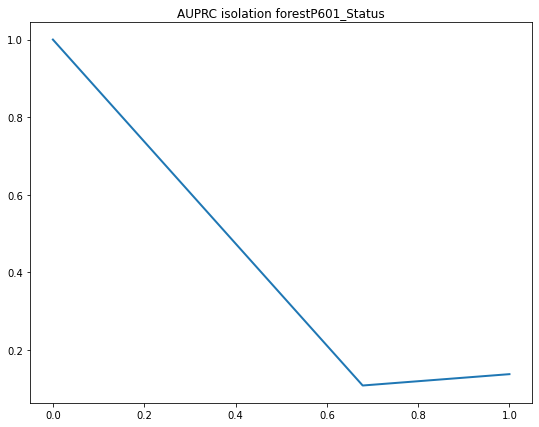

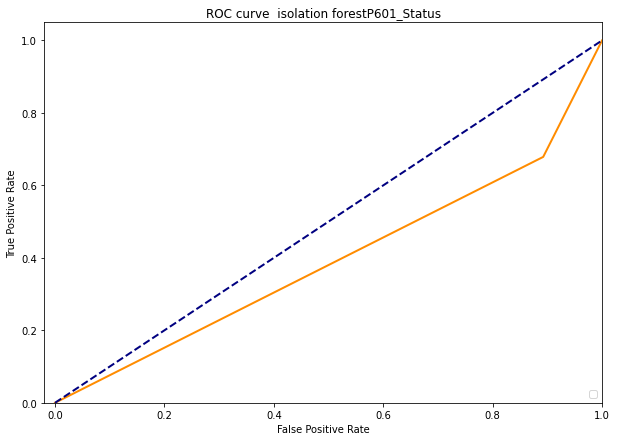

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
compTab =  Y.copy()
compTab['ifOutliers'] = ifOutliers

nbAnomalies = len(compTab.loc[compTab['isAttack']=='1'])
nbTruePos = len(compTab.loc[(compTab['isAttack']=='1') &\
                            (compTab['ifOutliers']==-1)])
print("Le nombre d'anomalies au total est: " + str(nbAnomalies)+"\n")
print("Le nombre de vrais positifs est: " + str(nbTruePos)+ "\n")
print("Le taux de detections correctes est de: " + \
      str(nbTruePos*100/nbAnomalies) +"%\n")

#AUPRC (Area Under the Precision-Recall Curve)
#print([int(label) for label in RFOutliers ], y_test)
print('AUPRC = {}'.format(average_precision_score(y_true=compTab['isAttack'],\
                                                y_score=compTab['ifOutliers'],\
                                                pos_label='1')))
precision, recall, thresholds = precision_recall_curve(compTab['isAttack'],\
                                                      compTab['ifOutliers'],\
                                                      pos_label='1')

plt.figure(figsize=(9,7))
plt.title("AUPRC isolation forest" + str(i))
plt.plot(recall, precision, lw=2.0)
#ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(compTab['isAttack'], compTab['ifOutliers'] , pos_label='1')
roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(9,7))
# plt.plot(fpr, tpr, lw=2.0)
plt.figure(figsize=(10,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  isolation forest' + str(i))
plt.legend(loc="lower right")
plt.show()

## Local Outlier Factor (LOF)
### Definition des paramètres du modèle

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# On peut faire varier n_neighbors pour obtenir des taux de detection
# differents, pour 5000 le taux de detection etait le plus elevé
clf = LocalOutlierFactor(n_neighbors=5000)

### Entrainement et prédiction du modèle

In [ ]:
lofOutliers = clf.fit_predict(X)
print(lofOutliers)

[1 1 1 ... 1 1 1]


### Evaluation de l'éfficacité de Local Outlier Factor

Le nombre d'anomalies au total est: 2053

Le nombre de vrais positifs est: 283

Le taux de detections correctes est de: 13.784705309303458%

AUPRC = 0.12324999706951417


No handles with labels found to put in legend.


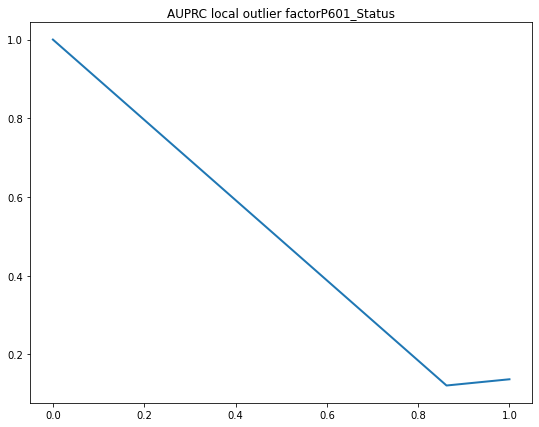

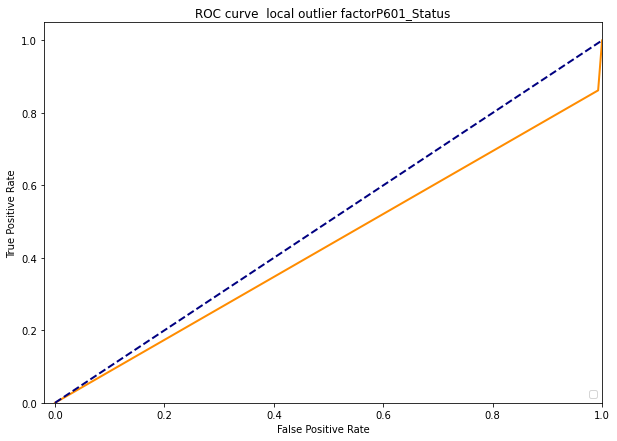

In [ ]:


compTab['lofOutliers'] = lofOutliers

nbTruePos = len(compTab.loc[(compTab['isAttack']=='1') &\
                            (compTab['lofOutliers']==-1)])
print("Le nombre d'anomalies au total est: " + str(nbAnomalies)+"\n")
print("Le nombre de vrais positifs est: " + str(nbTruePos)+ "\n")
print("Le taux de detections correctes est de: " + \
      str(nbTruePos*100/nbAnomalies) +"%\n")

#AUPRC (Area Under the Precision-Recall Curve)
#print([int(label) for label in RFOutliers ], y_test)
print('AUPRC = {}'.format(average_precision_score(y_true=compTab['isAttack'],\
                                                y_score=compTab['lofOutliers'],\
                                                pos_label='1')))
precision, recall, thresholds = precision_recall_curve(compTab['isAttack'],\
                                                      compTab['lofOutliers'],\
                                                      pos_label='1')

plt.figure(figsize=(9,7))
plt.title("AUPRC local outlier factor" + str(i))
plt.plot(recall, precision, lw=2.0)
#ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(compTab['isAttack'], compTab['lofOutliers'] , pos_label='1')
roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(9,7))
# plt.plot(fpr, tpr, lw=2.0)
plt.figure(figsize=(10,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve  local outlier factor' + str(i))
plt.legend(loc="lower right")
plt.show()

## Random Forest

On modifie la profondeur maximale des arbres de decisions.

/tmp/ipykernel_7739/2686874739.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
No handles with labels found to put in legend.


----- Profondeur maximale des arbres de decisions = 2 -----
Le nombre d'anomalies au total est: 384

Le nombre de vrais positifs est: 156

Le taux de detections correctes est de: 40.625%

Le score est de: 0.924
AUPRC = 0.48225


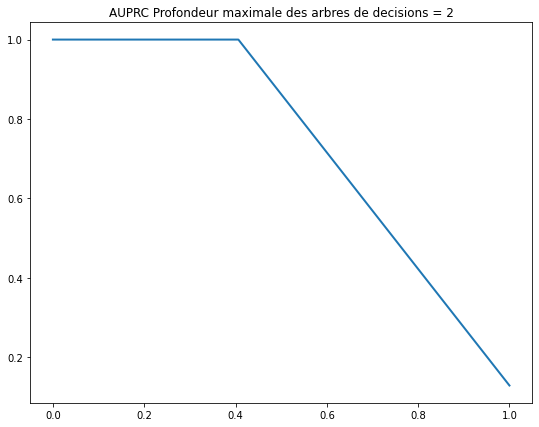

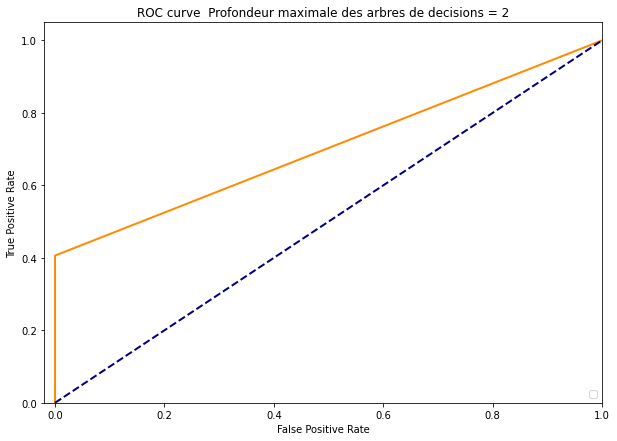

/tmp/ipykernel_7739/2686874739.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
No handles with labels found to put in legend.


----- Profondeur maximale des arbres de decisions = 3 -----
Le nombre d'anomalies au total est: 384

Le nombre de vrais positifs est: 306

Le taux de detections correctes est de: 79.6875%

Le score est de: 0.9736666666666667
AUPRC = 0.8202793159609121


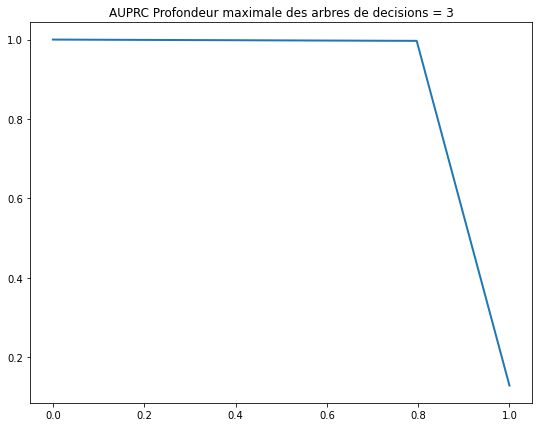

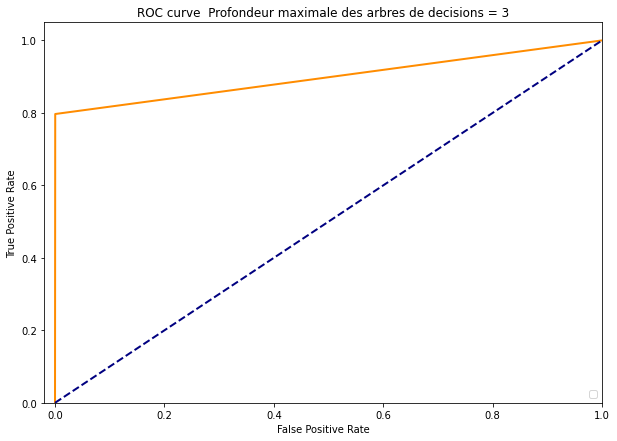

/tmp/ipykernel_7739/2686874739.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
No handles with labels found to put in legend.


----- Profondeur maximale des arbres de decisions = 4 -----
Le nombre d'anomalies au total est: 384

Le nombre de vrais positifs est: 369

Le taux de detections correctes est de: 96.09375%

Le score est de: 0.9946666666666667
AUPRC = 0.9633403716216217


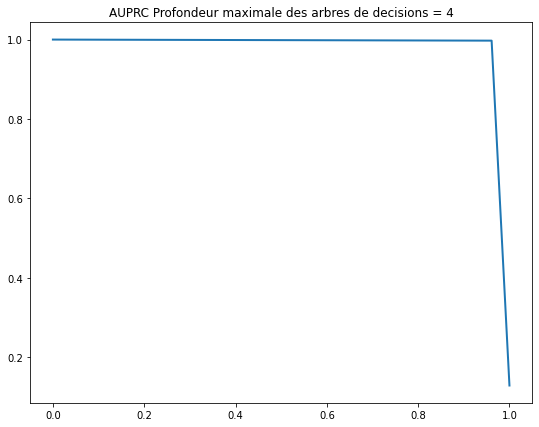

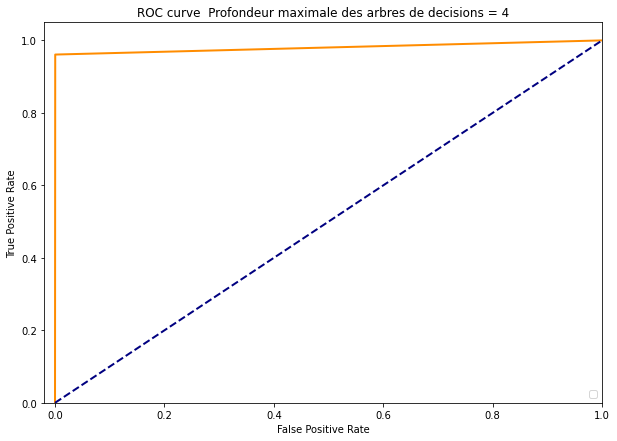

/tmp/ipykernel_7739/2686874739.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
No handles with labels found to put in legend.


----- Profondeur maximale des arbres de decisions = 5 -----
Le nombre d'anomalies au total est: 384

Le nombre de vrais positifs est: 376

Le taux de detections correctes est de: 97.91666666666667%

Le score est de: 0.9973333333333333
AUPRC = 0.9818333333333333


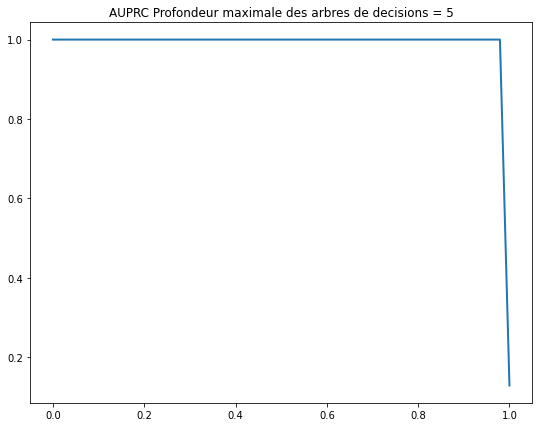

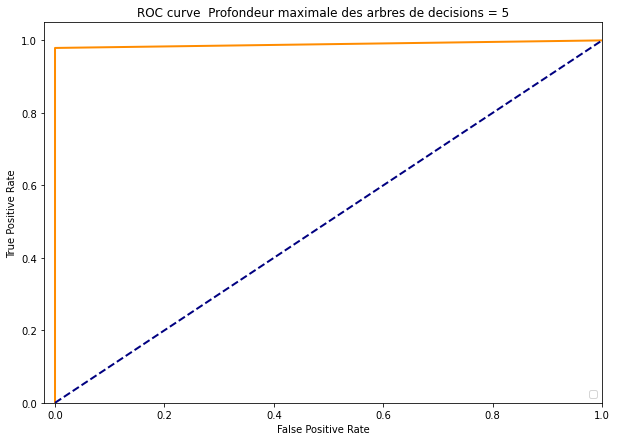

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,\
                                                    random_state=5)
for i in range(2, 6):
      clf = RandomForestClassifier(max_depth=i, random_state=0)
      clf.fit(X_train, y_train)

      RFOutliers = clf.predict(X_test)
      compTab =  y_test.copy()
      compTab['RFOutliers'] = RFOutliers
      
      nbAnomaliesTest = len(y_test.loc[y_test['isAttack']=='1'])

      nbTruePos = len(compTab.loc[(compTab['isAttack']=='1') &\
                              (compTab['RFOutliers']=='1')])
      print("----- Profondeur maximale des arbres de decisions = " + str(i) + " -----")
      print("Le nombre d'anomalies au total est: " + str(nbAnomaliesTest)+"\n")
      print("Le nombre de vrais positifs est: " + str(nbTruePos)+ "\n")
      print("Le taux de detections correctes est de: " + \
            str(nbTruePos*100/nbAnomaliesTest) +"%\n")
      print("Le score est de: " + \
            str(clf.score(X_test, y_test)))

      #AUPRC (Area Under the Precision-Recall Curve)
      #print([int(label) for label in RFOutliers ], y_test)
      print('AUPRC = {}'.format(average_precision_score(y_true=y_test,\
                                                      y_score=[int(label) for label in RFOutliers ],\
                                                      pos_label='1')))
      precision, recall, thresholds = precision_recall_curve(y_test,\
                                                            [int(label) for label in RFOutliers ],\
                                                            pos_label='1')

      plt.figure(figsize=(9,7))
      plt.title("AUPRC Profondeur maximale des arbres de decisions = " + str(i))
      plt.plot(recall, precision, lw=2.0)
      #ROC (Receiver Operating Characteristic)
      fpr, tpr, thresholds = roc_curve(y_test, [int(label) for label in RFOutliers ] , pos_label='1')
      roc_auc = auc(fpr, tpr)
      # plt.figure(figsize=(9,7))
      # plt.plot(fpr, tpr, lw=2.0)
      plt.figure(figsize=(10,7))
      lw = 2
      plt.plot(fpr, tpr, color='darkorange', lw=lw)
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([-0.02, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC curve  Profondeur maximale des arbres de decisions = ' + str(i))
      plt.legend(loc="lower right")
      plt.show()

## XGBoost

### Préparation des données

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,\
                                                    random_state=5)

### Définition des paramétres du modèle

On ajoute un poids pour équilibrer les données car dans notre jeu de donnés nous avons 2053 observations qui ont isAttack=1 et 12943 observations qui ont isAttack = 0.

In [ ]:
from xgboost import XGBClassifier
# nbr d'observations non attaque divisé par le nombre d'observations lors d'une attaque
weights = (Y['isAttack']=='0').sum() / (1.0 * (Y['isAttack']=='1').sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight=weights, n_jobs = 4)
xgbTestOutliers = clf.fit(X_train,y_train).predict(X_test)
probabilities = clf.predict_proba(X_test)

/home/porte/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/porte/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:46:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Evaluation de l'éfficacité d'xgboost

In [ ]:
compTab2 = y_test.copy()
compTab2['xgbTestOutliers'] = xgbTestOutliers

nbElts = len(y_test)
nbAnomaliesTest = len(y_test.loc[y_test['isAttack']=='1'])
nbTruePos = len(compTab2.loc[(compTab2['isAttack']=='1') &\
                             (compTab2['xgbTestOutliers']=='1')])
print("Le nombre d'elements dans y_test est: " + str(nbElts) +"\n")
print("Le nombre d'anomalies dans y_test est: " + str(nbAnomaliesTest) + "\n")
print("Le nombre d'anomalies detectées par XGBoost: " + str(nbTruePos) + "\n")

Le nombre d'elements dans y_test est: 3000

Le nombre d'anomalies dans y_test est: 384

Le nombre d'anomalies detectées par XGBoost: 384



In [ ]:
print("Pourcentage d'anomalies détectées par XGBoost par rapport au nombre réel d'anomalie : " + str((nbTruePos/nbAnomaliesTest)*100) + "%")

Pourcentage d'anomalies détectées par XGBoost par rapport au nombre réel d'anomalie : 100.0%


# Visualisation des resultats et interpretation

### Cover

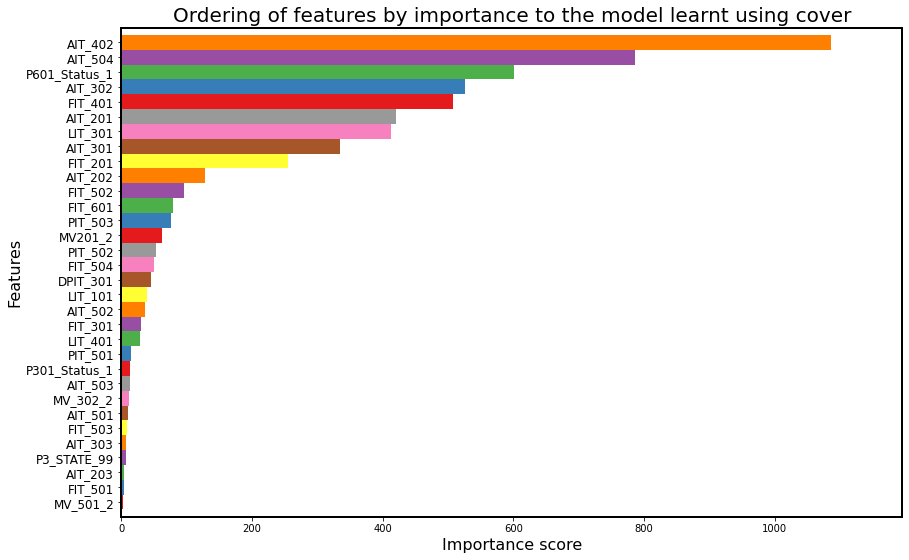

In [ ]:
from xgboost import plot_importance,  plot_tree

# Affichage de l'importance des colonnes selon le cover
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0,1,9))
ax = plot_importance(clf, height=1, color=colours, grid=False, \
                     show_values=False, importance_type='cover', ax=ax)

for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(2)

ax.set_xlabel('Importance score', size=16);
ax.set_ylabel('Features', size=16);
ax.set_yticklabels(ax.get_yticklabels(), size=12);
ax.set_title('Ordering of features by importance to the model learnt ' \
             'using cover', size=20);

### Gain

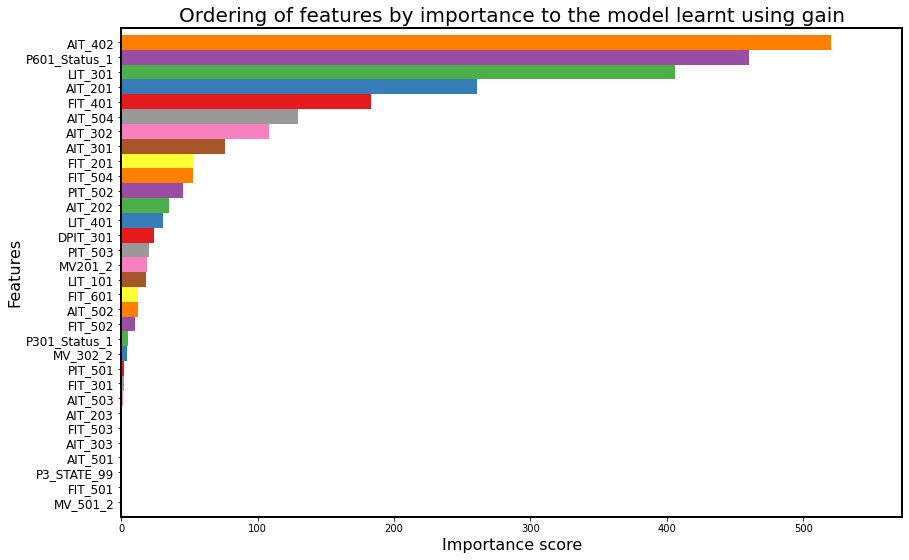

In [ ]:
# Affichage de l'importance des colonnes selon le gain
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0,1,9))
ax = plot_importance(clf, height=1, color=colours, grid=False, \
                     show_values=False, importance_type='gain', ax=ax)

for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(2)

ax.set_xlabel('Importance score', size=16);
ax.set_ylabel('Features', size=16);
ax.set_yticklabels(ax.get_yticklabels(), size=12);
ax.set_title('Ordering of features by importance to the model learnt ' \
             'using gain', size=20);

### Weight

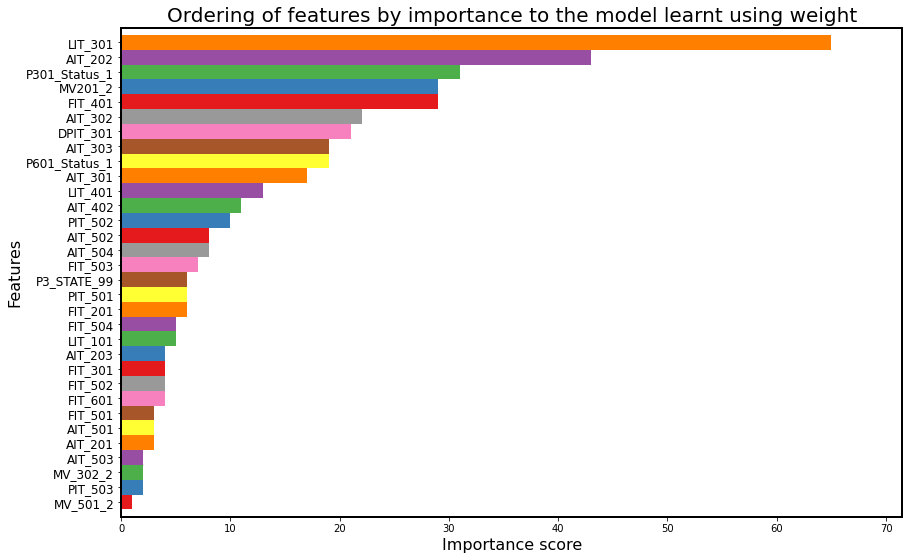

In [ ]:
# Affichage de l'importance des colonnes selon le weight
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0,1,9))
ax = plot_importance(clf, height=1, color=colours, grid=False, \
                     show_values=False, importance_type='weight', ax=ax)

for axis in ['top', 'bottom', 'left', 'right']:
  ax.spines[axis].set_linewidth(2)

ax.set_xlabel('Importance score', size=16);
ax.set_ylabel('Features', size=16);
ax.set_yticklabels(ax.get_yticklabels(), size=12);
ax.set_title('Ordering of features by importance to the model learnt ' \
             'using weight', size=20);

# Arbre du classifieur

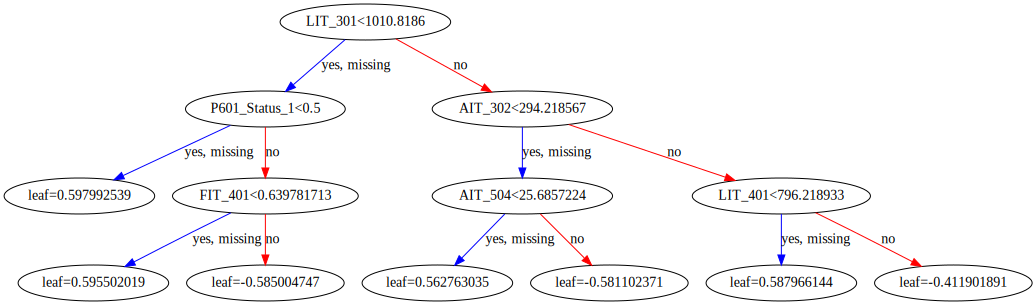

In [ ]:
from xgboost import to_graphviz
to_graphviz(clf)

## Courbe AUPRC

[[9.9997741e-01 2.2571410e-05]
 [9.9998915e-01 1.0853996e-05]
 [9.9999529e-01 4.7035824e-06]
 ...
 [9.9999493e-01 5.0873841e-06]
 [9.9969471e-01 3.0531021e-04]
 [9.9999857e-01 1.4375306e-06]]
AUPRC = 0.9999999999999999






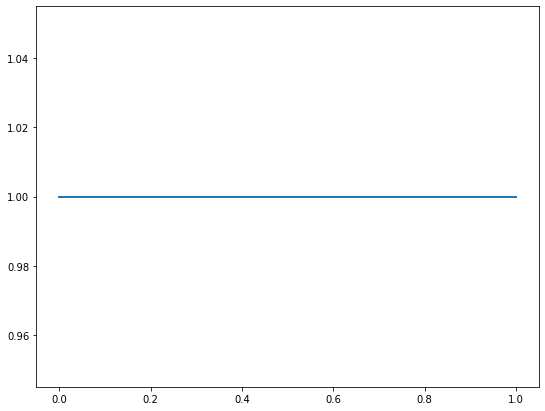

In [ ]:
#AUPRC (Area Under the Precision-Recall Curve)
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

print(probabilities)

print('AUPRC = {}'.format(average_precision_score(y_true=y_test,\
                                                  y_score=probabilities[:,1],\
                                                  pos_label='1')))
print("\n\n\n")
precision, recall, thresholds = precision_recall_curve(y_test,\
                                                       probabilities[:,1],\
                                                       pos_label='1')

plt.figure(figsize=(9,7))
plt.plot(recall, precision, lw=2.0)

## Courbe ROC

No handles with labels found to put in legend.


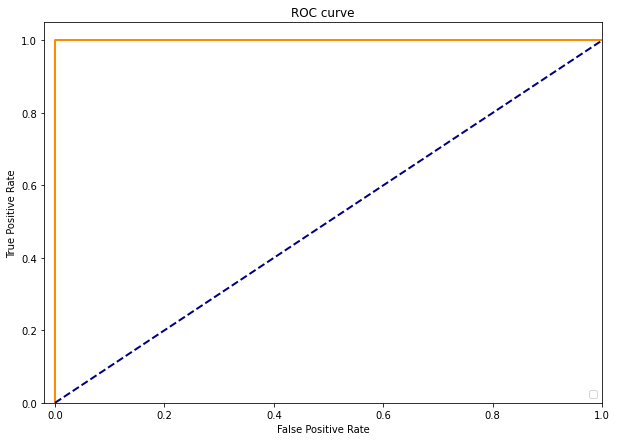

In [ ]:
#ROC (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1], pos_label='1')
roc_auc = auc(fpr, tpr)
# plt.figure(figsize=(9,7))
# plt.plot(fpr, tpr, lw=2.0)
plt.figure(figsize=(10,7))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# Interpretations

D'après ces résultats, nous pouvons conclure que l'attribut qui influence le plus grand nombre de prédictions (cover) est AIT 402 qui correspond à l'analyseur de NaHSO3 et de NaOCl dans la partie P4 du système de traitement.

L'attribut le plus important et le plus discriminant (gain) pour les prédictions est aussi AIT 402.

L'attribut qui est utilisé dans le plus grand nombre de splits dans les arbres de décision crées par XGBoost (weight) est LIT 301, qui correspond au detecteur de niveau d'eau dans le UF feed tank de la partie P3 du système de traitement.

Donc pour améliorer la sécurité du système, il faudrait idéalement regarder de plus près et avec plus de soin les attributs AIT 402 et LIT 301.

# Plot des données en 3D

In [ ]:
import matplotlib.lines as mlines

def show3D_data(X, Y, x_axis_name, y_axis_name, z_axis_name):
  x=x_axis_name
  y=y_axis_name
  z=z_axis_name
  zOffset = 0.02
  limit=len(X)

  sns.reset_orig() 

  fig = plt.figure(figsize=(10,12))
  ax = fig.add_subplot(111,projection='3d')
  ax.scatter(X.loc[Y['isAttack']=='0',x][:limit],\
             X.loc[Y['isAttack']=='0',y][:limit], \
             -np.log10(X.loc[Y['isAttack']=='0',z][:limit]+zOffset),\
             c='g', marker='.', s=1, label='genuine')
  ax.scatter(X.loc[Y['isAttack']=='1',x][:limit],\
             X.loc[Y['isAttack']=='1',y][:limit],\
             -np.log10(X.loc[Y['isAttack']=='1',z][:limit] + zOffset),\
             c='r', marker='.', s=1, label='anomalies')
  ax.set_xlabel(x,size=16);
  ax.set_ylabel(y, size=16);
  ax.set_zlabel('- log$_{10}$ (' +z+ ')', size=16)
  ax.set_title('Plot of genuine data and anomalies base on 3 properties',\
               size=20)

  plt.axis('tight')
  ax.grid(1)

  noAnomalyMaker = mlines.Line2D([], [], linewidth=0, color='g', marker='.',\
                               markersize=10, label='genuine')
  anomalyMaker = mlines.Line2D([], [], linewidth=0, color='r', marker='.',\
                             markersize=10, label='anomalies')
  
  plt.legend(handles=[noAnomalyMaker, anomalyMaker], \
             bbox_to_anchor=(1.20, 0.38), frameon=False, prop={'size':16});

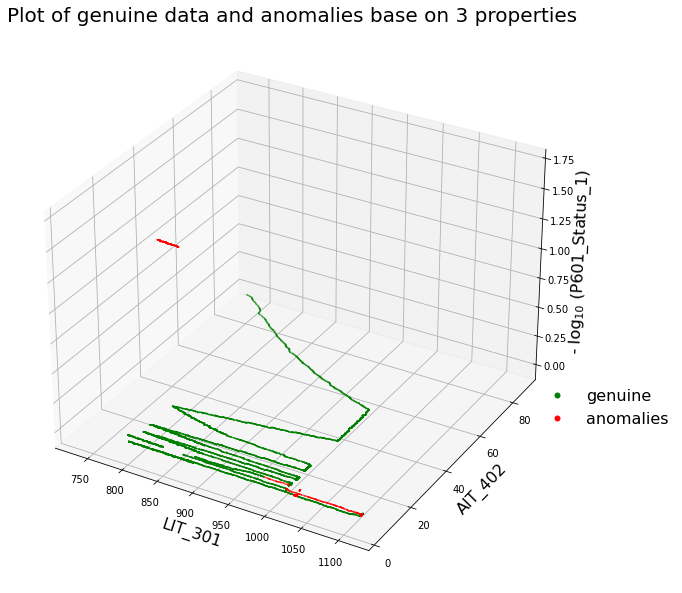

In [ ]:
show3D_data(X,Y,'LIT_301','AIT_402', 'P601_Status_1')

#### Plot d'autres attributs importants

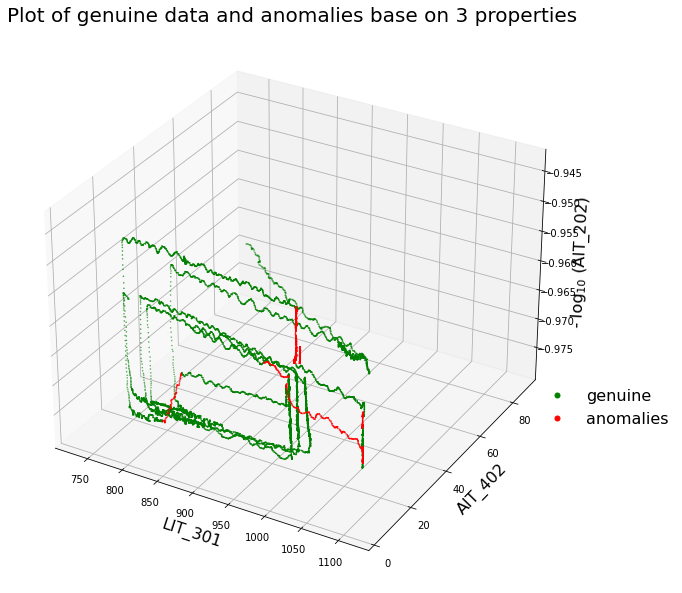

In [ ]:
show3D_data(X,Y,'LIT_301','AIT_402', 'AIT_202')

# PCA

On créer un nouveau dataframe qui differencie les differentes attaques pour l'affichage.

In [ ]:
new_y = pd.DataFrame(columns=['is_attack_detail'])

for i in range(len(df)):
    if (df.at[i,'FIT401_attack'] == '1'):
        new_row = {'is_attack_detail':'1'}
        new_y = new_y.append(new_row, ignore_index=True)
    elif (df.at[i,'LIT301_attack'] == '1'):
        new_row = {'is_attack_detail':'2'}
        new_y = new_y.append(new_row, ignore_index=True)
    elif (df.at[i,'P601_attack'] == '1'):
        new_row = {'is_attack_detail':'3'}
        new_y = new_y.append(new_row, ignore_index=True)
    elif (df.at[i,'MultiPoint_attack'] == '1'):
        new_row = {'is_attack_detail':'4'}
        new_y = new_y.append(new_row, ignore_index=True)
    elif (df.at[i,'MV501_attack'] == '1'):
        new_row = {'is_attack_detail':'5'}
        new_y = new_y.append(new_row, ignore_index=True)
    elif (df.at[i,'P301_attack'] == '1'):
        new_row = {'is_attack_detail':'6'}
        new_y = new_y.append(new_row, ignore_index=True)
    else:
        new_row = {'is_attack_detail':'0'}
        new_y = new_y.append(new_row, ignore_index=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca_bis = pca.fit(X)

principal_components = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf = pd.concat([finalDf, new_y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,isAttack,is_attack_detail
0,129.264241,-204.826144,0,0
1,129.530638,-204.452694,0,0
2,129.180631,-203.004077,0,0
3,129.624511,-202.490752,0,0
4,130.275124,-202.057385,0,0


On affiche les données sur le plan de l'ACP en les différenciant selon 2 possibilités (attaque ou non)

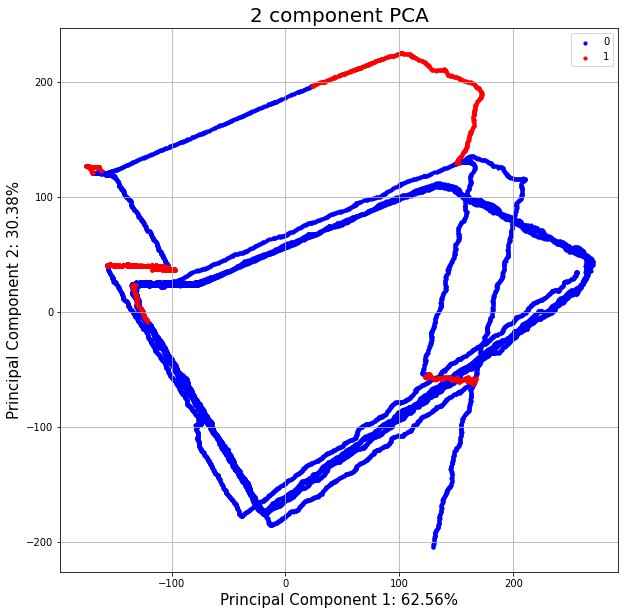

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[0]*100)+'%', fontsize = 15)
ax.set_ylabel('Principal Component 2: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[1]*100)+'%', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
labels = ['0', '1']
colors = ['b', 'r']
for target, color in zip(labels,colors):
    indicesToKeep = finalDf['isAttack'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(labels)
ax.grid()

Ici on affiche les 6 attaques d'une couleur differente

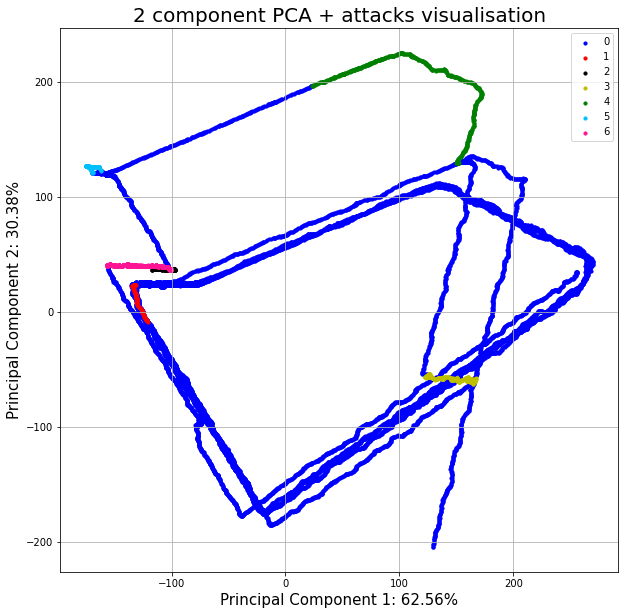

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[0]*100)+'%', fontsize = 15)
ax.set_ylabel('Principal Component 2: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[1]*100)+'%', fontsize = 15)
ax.set_title('2 component PCA + attacks visualisation', fontsize = 20)
labels = ['0', '1', '2', '3', '4', '5', '6']
colors = ['b', 'r', 'black', 'y', 'g', 'deepskyblue', 'deeppink']
for target, color in zip(labels,colors):
    indicesToKeep = finalDf['is_attack_detail'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(labels)
ax.grid()

In [ ]:
print(pca_bis.explained_variance_ratio_)
print(str(round(pca_bis.explained_variance_ratio_.sum() * 100, 2)) + ' %')

[0.62560855 0.30382306]
92.94 %


On voit que les 2 premieres composantes principales garde 92,94% de l'information ce qui nous semble correcte.

### Cercle de correlation

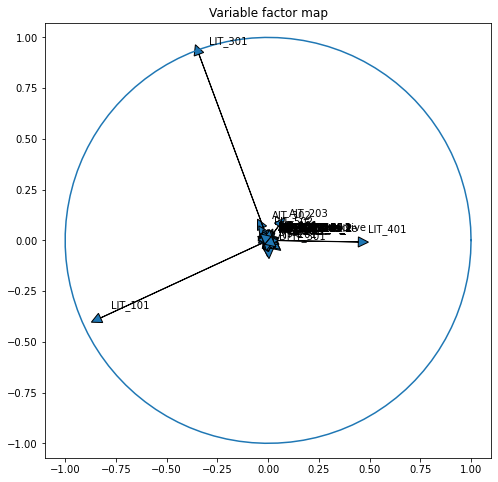

In [ ]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca_bis.components_.shape[1]):
    ax.arrow(0,
             0,
             pca_bis.components_[0, i],
             pca_bis.components_[1, i],
             head_width=0.05,
             head_length=0.05)

    plt.text(pca_bis.components_[0, i] + 0.05,
             pca_bis.components_[1, i] + 0.05,
             X.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

# KMeans (2 clusters)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
compTabKmeans = Y.copy()
compTabKmeans['kmeansOutliers'] = kmeans.labels_

nbElts = len(Y)
nbAnomaliesTest = len(Y.loc[Y['isAttack']=='1'])
nbTruePos = len(compTabKmeans.loc[(compTabKmeans['isAttack']=='1') &\
                             (compTabKmeans['kmeansOutliers']==0)])
print("Le nombre d'elements dans Y est: " + str(nbElts) +"\n")
print("Le nombre d'anomalies dans Y est: " + str(nbAnomaliesTest) + "\n")
print("Le nombre d'anomalies detectées par Kmeans: " + str(nbTruePos) + "\n")

Le nombre d'elements dans Y est: 14996

Le nombre d'anomalies dans Y est: 2053

Le nombre d'anomalies detectées par Kmeans: 1359



In [ ]:
finalDf['Kmeans_2_cluster'] = kmeans.labels_.tolist()
finalDf.head()

,principal component 1,principal component 2,isAttack,is_attack_detail,Kmeans_2_cluster
0,129.264241,-204.826144,0,0,1
1,129.530638,-204.452694,0,0,1
2,129.180631,-203.004077,0,0,1
3,129.624511,-202.490752,0,0,1
4,130.275124,-202.057385,0,0,1


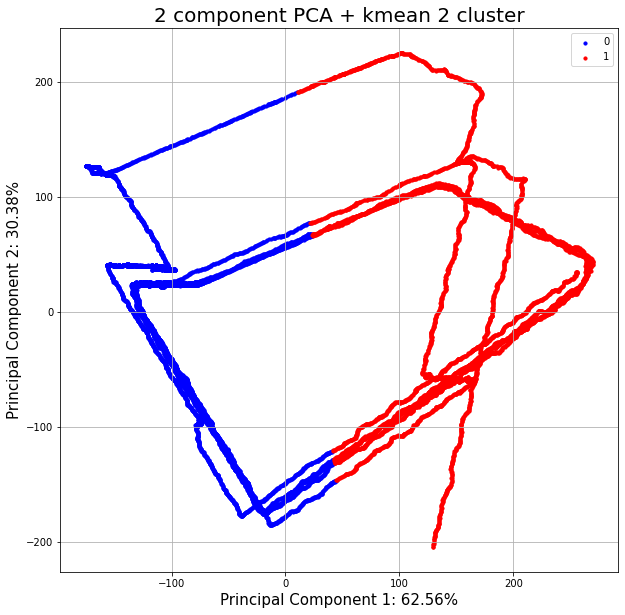

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[0]*100)+'%', fontsize = 15)
ax.set_ylabel('Principal Component 2: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[1]*100)+'%', fontsize = 15)
ax.set_title('2 component PCA + kmean 2 cluster', fontsize = 20)
labels = [0, 1]
colors = ['b', 'r']
for target, color in zip(labels,colors):
    indicesToKeep = finalDf['Kmeans_2_cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(labels)
ax.grid()

# KMeans (7 clusters)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

print(kmeans.labels_)

[3 3 3 ... 1 1 1]


In [ ]:
finalDf['Kmeans_7_cluster'] = kmeans.labels_.tolist()
finalDf.head()

,principal component 1,principal component 2,isAttack,is_attack_detail,Kmeans_2_cluster,Kmeans_7_cluster
0,129.264241,-204.826144,0,0,1,3
1,129.530638,-204.452694,0,0,1,3
2,129.180631,-203.004077,0,0,1,3
3,129.624511,-202.490752,0,0,1,3
4,130.275124,-202.057385,0,0,1,3


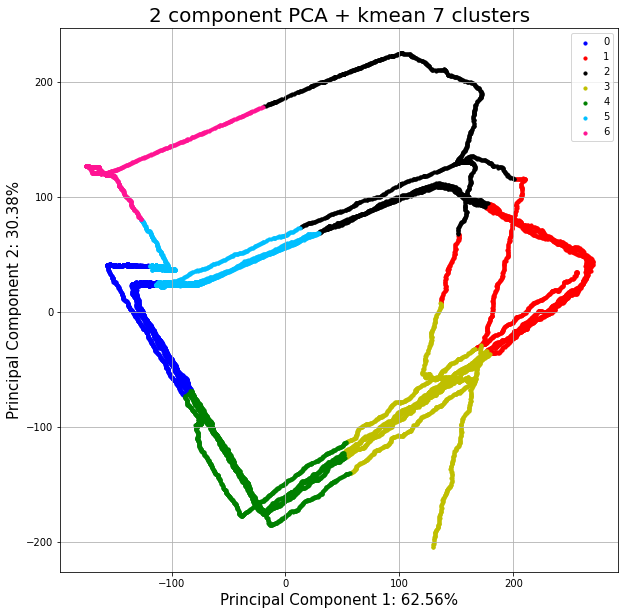

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[0]*100)+'%', fontsize = 15)
ax.set_ylabel('Principal Component 2: '+"{:.2f}".format(pca_bis.explained_variance_ratio_[1]*100)+'%', fontsize = 15)
ax.set_title('2 component PCA + kmean 7 clusters', fontsize = 20)
labels = [0, 1, 2, 3, 4, 5, 6]
colors = ['b', 'r', 'black', 'y', 'g', 'deepskyblue', 'deeppink']
for target, color in zip(labels,colors):
    indicesToKeep = finalDf['Kmeans_7_cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(labels)
ax.grid()